In [57]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [128]:
with open('../outputs/Revised_AnalyzeData.pickle', 'rb') as f:
    [total_label,total_instance_number, total_instance_in_sequence,total_delta_time] = pickle.load(f)

In [129]:
promedio_persona=[]
for persona in total_delta_time:
    promedio_trayectorias=[]
    for trayectorias in persona:
        puntos = np.array(trayectorias)
        promedio_trayectorias.append(np.mean(puntos))
    a=np.array(promedio_trayectorias)
    promedio_persona.append(np.mean(a))

In [130]:
def promedio(datos):
    suma=0
    count=0
    for dato in datos:
        if(abs(dato)<100):
            suma=suma+abs(dato)
            count=count+1
    if(count!=0):
        return suma/count
    return 0
def contar(datos):
    c=0
    for dato in datos:
        c=c+1
    return c

def sumar(datos):
    c=0
    for dato in datos:
        c=c+dato
    return c

In [131]:

p=[]
c=0
promedio_persona=[]
for persona in total_delta_time:
    promedio_trayectoria=[]
    for trayectoria in persona:
        promedio_trayectoria.append(promedio(trayectoria))
    promedio_persona.append(promedio(promedio_trayectoria))
    p.append(c)
    c=c+1
     
print (sumar(p))

496


Text(0.5, 1.0, 'Promedio de puntos gps por trayectoria y persona')

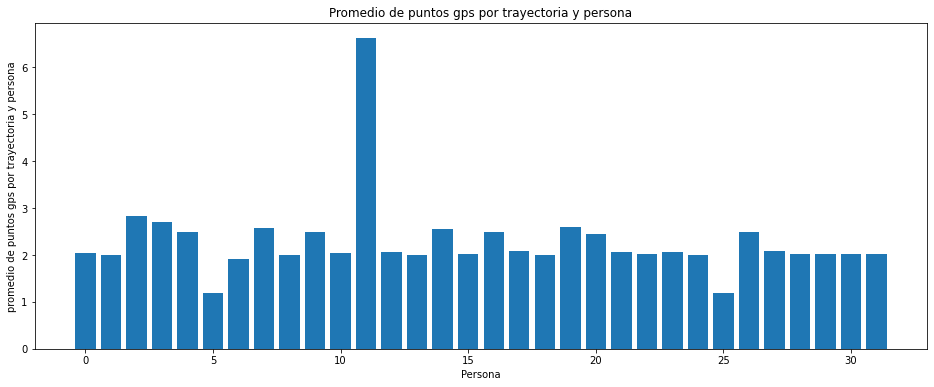

In [132]:
plt.figure(figsize=(16,6))
## Declaramos valores para el eje x
eje_x = p
 
## Declaramos valores para el eje y
eje_y = promedio_persona
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('promedio de puntos gps por trayectoria y persona')
 
## Legenda en el eje x
plt.xlabel('Persona')
 
## Título de Gráfica
plt.title('Promedio de puntos gps por trayectoria y persona')
 
## Mostramos Gráfica

In [133]:
trayectorias_por_persona = []
persona = []
cantidad_gente_por_label={}
c=0
for element in total_instance_number:
    persona.append(c)
    trayectorias_por_persona.append(len(element))
    c=c+1

for trayectoria in total_label:
    for label in trayectoria:
        cantidad=cantidad_gente_por_label.get(label)
        if(cantidad==None):
            cantidad=0
        cantidad = cantidad +1
        cantidad_gente_por_label.update({label:cantidad})
print (sumar(trayectorias_por_persona))

240495


Text(0.5, 1.0, 'Cantidad de trayectorias x personas')

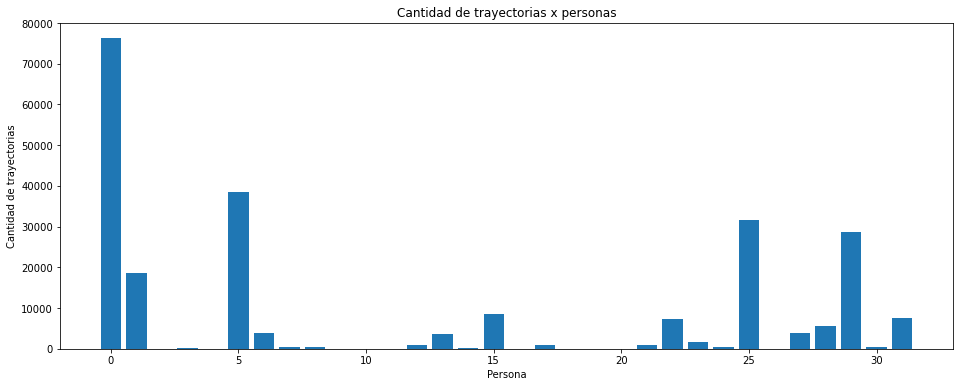

In [134]:
plt.figure(figsize=(16,6))
## Declaramos valores para el eje x
eje_x = persona
 
## Declaramos valores para el eje y
eje_y = trayectorias_por_persona
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Cantidad de trayectorias')
 
## Legenda en el eje x
plt.xlabel('Persona')
 
## Título de Gráfica
plt.title('Cantidad de trayectorias x personas')
 
## Mostramos Gráfica


In [135]:
mode_index = {0:"walk",1: "run",2: "bike",3: "bus", 4:"car",5: "taxi", 6:"subway", 7:"railway",
                  8:"train",9: "motocycle",10: "boat", 11: "airplane", 12:"other"}

def getLabel(number):
    return mode_index.get(number)


240495


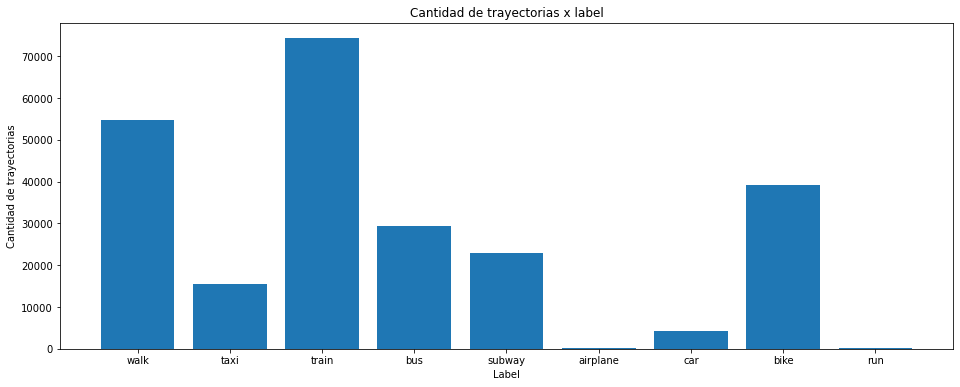

In [136]:
#print(cantidad_gente_por_label.keys())
#print(cantidad_gente_por_label.values())

plt.figure(figsize=(16,6))
## Declaramos valores para el eje x
eje_x = list(map(getLabel,cantidad_gente_por_label.keys()))
 
## Declaramos valores para el eje y
eje_y = cantidad_gente_por_label.values()
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Cantidad de trayectorias')
 
## Legenda en el eje x
plt.xlabel('Label')
 
## Título de Gráfica
plt.title('Cantidad de trayectorias x label')
 
## Mostramos Gráfica
print(sumar(cantidad_gente_por_label.values()))

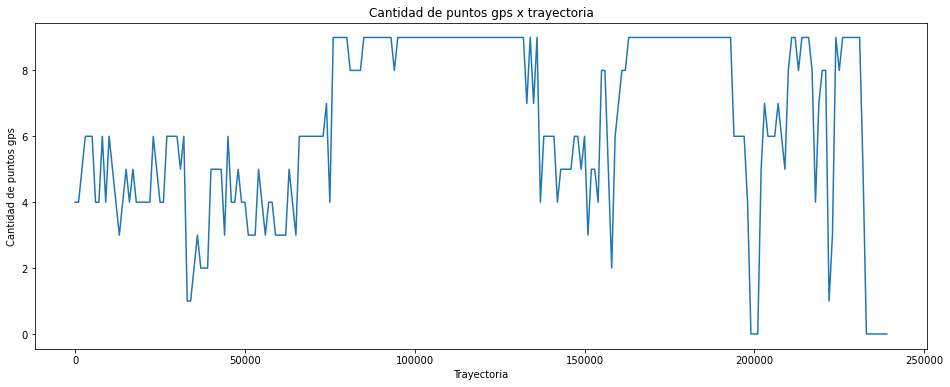

In [137]:
x=[]
y=[]
c=0
d=0
suma=0
for persona in total_instance_number:
    for trayectoria in persona:
        suma=suma+trayectoria
        c=c+1
        if(c==1000):
            y.append(int(suma/c))
            x.append(d)
            d=d+1000
            suma=0
            c=0

plt.subplots(figsize=(16,6))

## Título de Gráfica
plt.title('Cantidad de puntos gps x trayectoria')

## Legenda en el eje y
plt.ylabel('Cantidad de puntos gps')
 
## Legenda en el eje x
plt.xlabel('Trayectoria')

plt.plot(x, y)
plt.show()